## Problem Statement

**We are using Machine Learning algorithms to bring out conclusions and forecast decisions on the cardio dataset which contains details of patients, and using those details we have to arrive at a conclusion if the patient has Cardiovascular Disease or not and help them take preventive measures.**


**Importing the required libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
from warnings import filterwarnings
pd.options.display.max_rows = None   
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from xgboost import XGBClassifier

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

### Dataset contains the following Features :


**id** : It's just the Id no of the row. (Not revelant)

**age** : It's the age of a person in Days.

**gender** : It's the gender of the person.

**height** : It's the height of the person in cm.

**weight** : It's the weight of the person in kg.

**ap_hi** : It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below.

**ap_low** : It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value : 80mmhg or Below.

**cholesterol** : It's the Cholestreol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High.

**gluc** : It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL.

**smoke** : It contain Binary Values stating whether Person is a Smoker or not i.e. {0 : 'Not a Smoker', 1 : 'Smoker'}

**alco** : It contain Binary Values stating whether Person is an alchoalic or not i.e. {0 : 'Not a Alchoalic', 1 : 'Alchoalic'}

**active** : It contain Binary Values stating whether Person is involved in physical activites or not i.e. {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'}

**cardio** : It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e. {0 : 'Not Have CVD', 1 : 'Have CVD'}

# Reading the Dataset

In [3]:
df_cardio=pd.read_csv('Cardio.csv',sep=';')
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


In [4]:
df_cardio.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.000000,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.000000,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.000000,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.000000,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.000000,120,80,2,1,0,0,1,0


In [5]:
df_cardio.shape

(70000, 13)

**This dataset has 70000 Rows and 13 Columns.**

# EDA

In [6]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

**There are no Missing values present**

In [9]:
#checking for duplicates in the dataset
df_cardio.duplicated().sum()

0

In [10]:
# The age is given in days, we have to convert it into years
df_cardio["age"] = df_cardio["age"]/365
df_cardio["age"] = df_cardio["age"].astype("int")

In [11]:
# Dropping id column, its of no use.
df_cardio = df_cardio.drop(columns = ["id"])

In [12]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.000000,110,80,1,1,0,0,1,0
1,55,1,156,85.000000,140,90,3,1,0,0,1,1
2,51,1,165,64.000000,130,70,3,1,0,0,0,1
3,48,2,169,82.000000,150,100,1,1,0,0,1,1
4,47,1,156,56.000000,100,60,1,1,0,0,0,0


Text(0.5, 1.0, 'Visualization of outliers')

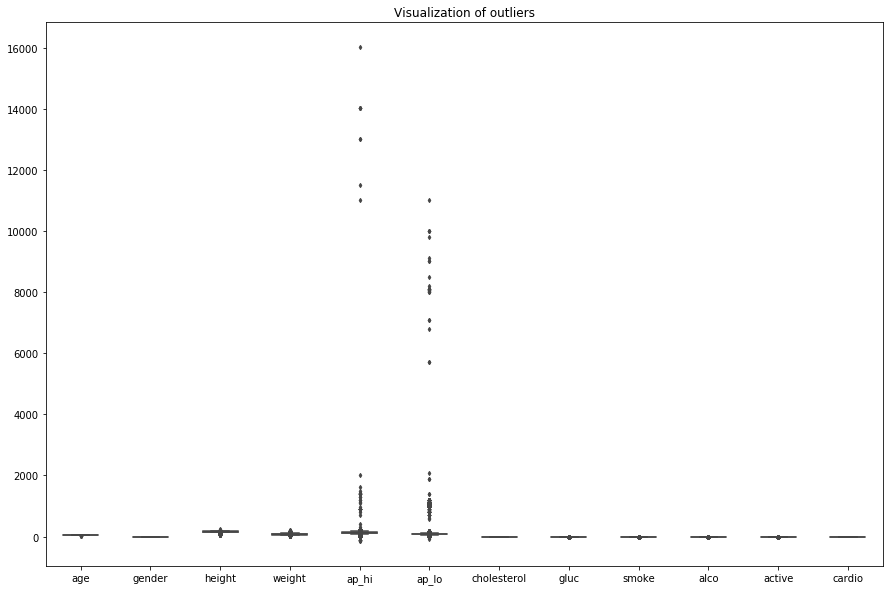

In [13]:
#checking if there are outliers present
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df_cardio, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers")

majority of the Outliers are present in ap_hi and ap_lo

In [14]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [15]:
df_cardio.cardio.unique()

array([0, 1], dtype=int64)

In [16]:
df_cardio.ap_hi.unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [17]:
df_cardio.ap_lo.unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

In [18]:
df_cardio.ap_hi=df_cardio.ap_hi.replace(-100,abs(-100))
df_cardio.ap_hi=df_cardio.ap_hi.replace(-120,abs(-120))
df_cardio.ap_hi=df_cardio.ap_hi.replace(-150,abs(-150))
df_cardio.ap_hi=df_cardio.ap_hi.replace(-115,abs(-115))
df_cardio.ap_hi=df_cardio.ap_hi.replace(-140,abs(-140))

In [19]:
df_cardio.ap_hi.unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
         909,   109,    85,   106,   129,    93,     7,    95,   179,
         156,   168,   132,   104,   103,   178,   175,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [20]:
df_cardio.ap_lo=df_cardio.ap_lo.replace(-70,abs(-70))

In [21]:
df_cardio.ap_lo.unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

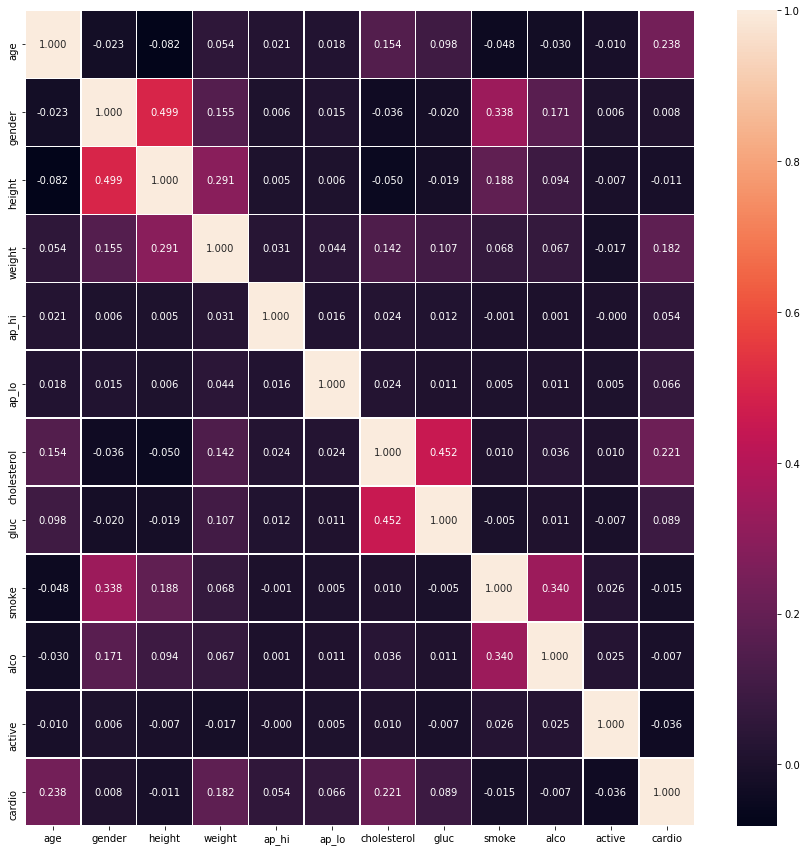

In [22]:
# creating a heatmap of correlation of the data.
corr = df_cardio.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

As you can see in the above heatmap, there are correlations among gender and height, app_lo and app_hi, gluc and cholestrol, and a small correlation among smoke and alco.

Body Mass Index (BMI) Height and weight seems uncorrelated with the cardio feature but Body Mass Index (BMI) could be helpful to train our model

In [23]:
df_cardio["bmi"] = df_cardio["weight"]/ (df_cardio["height"]/100)**2

In [24]:
df_cardio.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.000000,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679


In [25]:
# Detecting Genders
a = df_cardio[df_cardio["gender"]==1]["height"].mean()
b = df_cardio[df_cardio["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


Women have many of the same risk factors with men for heart disease as men, such as smoking, high blood pressure, and high cholesterol especially after 65.

Thus we shouldn't categorize them into 1 and 2 because of 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to men for having a disease

In [26]:
df_cardio["gender"] = df_cardio["gender"] % 2
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,0,168,62.000000,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.000000,130,70,3,1,0,0,0,1,23.507805
3,48,0,169,82.000000,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.000000,100,60,1,1,0,0,0,0,23.011177


In [27]:
df_cardio["smoke"]=df_cardio["smoke"].astype(object)
df_cardio["alco"]=df_cardio["alco"].astype(object)
df_cardio["active"]=df_cardio["active"].astype(object)

In [28]:
df_cardio.dtypes

age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke           object
alco            object
active          object
cardio           int64
bmi            float64
dtype: object

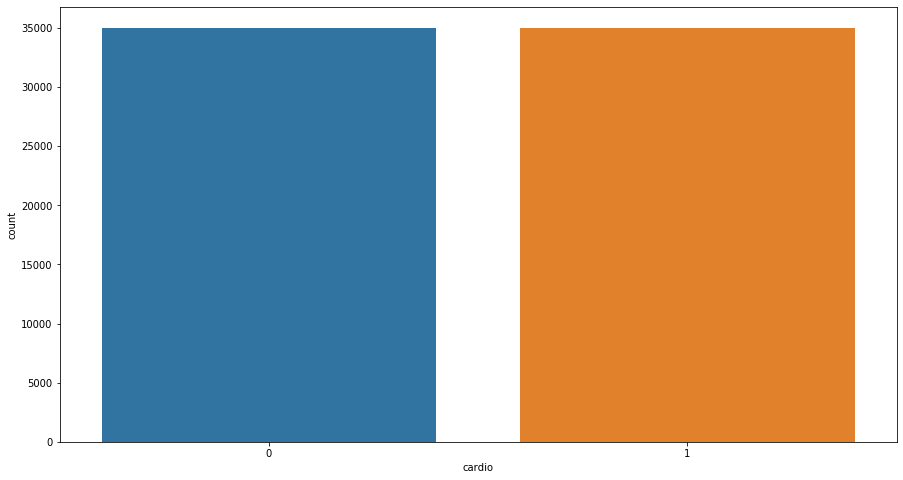

In [29]:
sns.countplot(df_cardio["cardio"])

**We can see that the data is balanced as there is no much difference**

In [30]:
data_obj=df_cardio.select_dtypes('object')

encoded=pd.get_dummies(data_obj,drop_first=True).astype('int')
encoded.head()

,smoke_1,alco_1,active_1
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,0


In [31]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df_cardio['scaled_age'] = min_max.fit_transform(df_cardio[['age']])
df_cardio['scaled_gender'] = min_max.fit_transform(df_cardio[['gender']])
df_cardio['scaled_height'] = min_max.fit_transform(df_cardio[['height']])
df_cardio['scaled_weight'] = min_max.fit_transform(df_cardio[['weight']])
df_cardio['scaled_ap_hi'] = min_max.fit_transform(df_cardio[['ap_hi']])
df_cardio['scaled_ap_lo'] = min_max.fit_transform(df_cardio[['ap_lo']])
df_cardio['scaled_cholesterol'] = min_max.fit_transform(df_cardio[['cholesterol']])
df_cardio['scaled_gluc'] = min_max.fit_transform(df_cardio[['gluc']])

df_cardio['scaled_bmi'] = min_max.fit_transform(df_cardio[['bmi']])

In [32]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,scaled_age,scaled_gender,scaled_height,scaled_weight,scaled_ap_hi,scaled_ap_lo,scaled_cholesterol,scaled_gluc,scaled_bmi
0,50,0,168,62.000000,110,80,1,1,0,0,1,0,21.967120,0.600000,0.000000,0.579487,0.273684,0.006804,0.007273,0.000000,0.000000,0.062655
1,55,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679,0.742857,1.000000,0.517949,0.394737,0.008677,0.008182,1.000000,0.000000,0.106560
2,51,1,165,64.000000,130,70,3,1,0,0,0,1,23.507805,0.628571,1.000000,0.564103,0.284211,0.008053,0.006364,1.000000,0.000000,0.067874
3,48,0,169,82.000000,150,100,1,1,0,0,1,1,28.710479,0.542857,0.000000,0.584615,0.378947,0.009301,0.009091,0.000000,0.000000,0.085498
4,47,1,156,56.000000,100,60,1,1,0,0,0,0,23.011177,0.514286,1.000000,0.517949,0.242105,0.006180,0.005455,0.000000,0.000000,0.066192


In [33]:
k1=df_cardio.drop(["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","bmi"], axis=1)
k1.head()

,cardio,scaled_age,scaled_gender,scaled_height,scaled_weight,scaled_ap_hi,scaled_ap_lo,scaled_cholesterol,scaled_gluc,scaled_bmi
0,0,0.600000,0.000000,0.579487,0.273684,0.006804,0.007273,0.000000,0.000000,0.062655
1,1,0.742857,1.000000,0.517949,0.394737,0.008677,0.008182,1.000000,0.000000,0.106560
2,1,0.628571,1.000000,0.564103,0.284211,0.008053,0.006364,1.000000,0.000000,0.067874
3,1,0.542857,0.000000,0.584615,0.378947,0.009301,0.009091,0.000000,0.000000,0.085498
4,0,0.514286,1.000000,0.517949,0.242105,0.006180,0.005455,0.000000,0.000000,0.066192


In [34]:
final=pd.concat([k1,encoded], axis=1)
final.head()

,cardio,scaled_age,scaled_gender,scaled_height,scaled_weight,scaled_ap_hi,scaled_ap_lo,scaled_cholesterol,scaled_gluc,scaled_bmi,smoke_1,alco_1,active_1
0,0,0.600000,0.000000,0.579487,0.273684,0.006804,0.007273,0.000000,0.000000,0.062655,0,0,1
1,1,0.742857,1.000000,0.517949,0.394737,0.008677,0.008182,1.000000,0.000000,0.106560,0,0,1
2,1,0.628571,1.000000,0.564103,0.284211,0.008053,0.006364,1.000000,0.000000,0.067874,0,0,0
3,1,0.542857,0.000000,0.584615,0.378947,0.009301,0.009091,0.000000,0.000000,0.085498,0,0,1
4,0,0.514286,1.000000,0.517949,0.242105,0.006180,0.005455,0.000000,0.000000,0.066192,0,0,0


In [35]:
final.shape

(70000, 13)

#### Functions for model building

In [36]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [37]:
score_card=pd.DataFrame(columns=['Model Name',
                                 'Accuracy',
                                 'Precision',
                                 'Recall',
                                 'F1_score',
                                 'Kappa',
                                 'AUC Score'])

In [38]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):   
    y_pred = model.predict(X_test)    
    y_pred= [0 if x<0.5 else 1   for x in y_pred]   
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [39]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix_rfe(model,X_test_rfe):   
    y_pred = model.predict(X_test_rfe)   
    y_pred= [0 if x<0.5 else 1   for x in y_pred]    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [40]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [41]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc_rfe(model,X_test_rfe):
    y_pred_prob = model.predict(X_test_rfe)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [42]:
# function for calculating the various scores

# create an empty dataframe to store the scores for various algorithms
final_score_card = pd.DataFrame(columns=['Model Name','Accuracy Score', 'Precision Score', 'Recall Score',
                                       'Kappa Score', 'f1-Score', 'AUC Score'])
def update_final_score_card(model,model_name):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    global final_score_card
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)},
                                    ignore_index = True)

In [43]:
def update_final_score_card_rfe(model,model_name,X_test_rfe):
    y_pred_prob = model.predict(X_test_rfe)
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    global final_score_card
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

In [44]:
def update_final_score_card_rfe_threshold(model,model_name,threshold,X_test_rfe):
    y_pred_prob = model.predict(X_test_rfe)
    y_pred = [ 0 if x < threshold else 1 for x in y_pred_prob]
    global final_score_card
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

# **Model building**

In [45]:
X = final.drop(columns = ['cardio'])
y = final['cardio']
X=sm.add_constant(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 9)

In [47]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (49000, 13)
Y train shape:  (49000,)
X test shape:  (21000, 13)
Y test shape:  (21000,)


**Logistic regression classification**

In [48]:
model_base=sm.Logit(y_train,X_train).fit()
print(model_base.summary())

Optimization terminated successfully.
         Current function value: 0.585728
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48987
Method:                           MLE   Df Model:                           12
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.1550
Time:                        15:30:44   Log-Likelihood:                -28701.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.6680      0.282    -23.679      0.000      -7.220      -6.116
scale

Here we can see that the Log-Likelyhood is greater than the LL-Null. This shows that the most of features are significant. Upon looking at the p-value, we can say that scaled gender and scaled bmi are insignificant as there values are greater than the p-value.

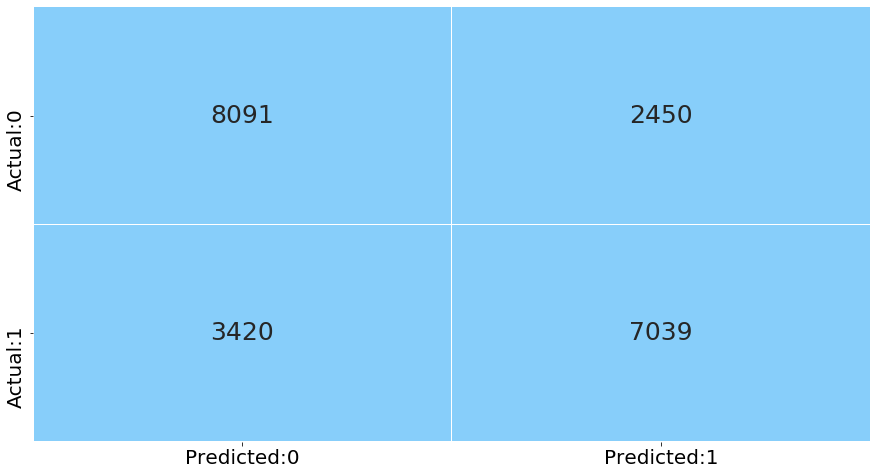

In [49]:
plot_confusion_matrix(model_base)

True negative: 8091

True positive: 7039

False negative: 3420

False positive: 2450

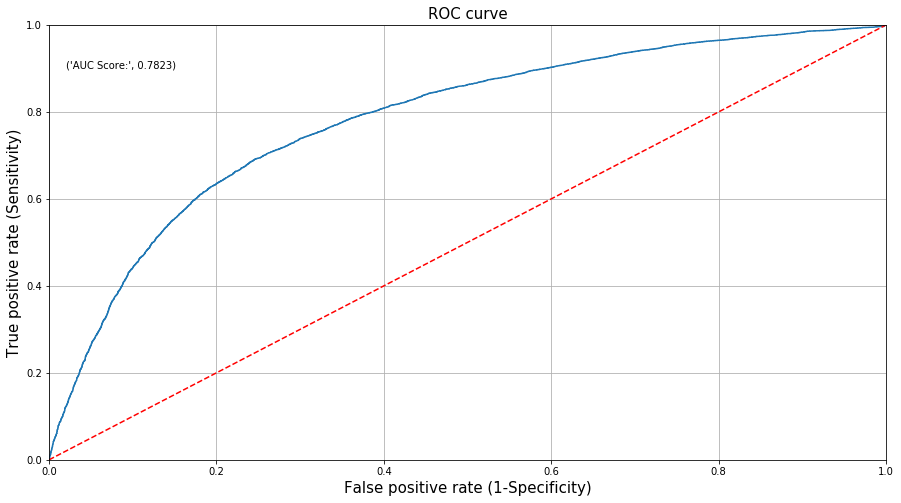

In [50]:
plot_roc(model_base)

The Area under the curve(AUC) score: 0.7823

In [51]:
update_final_score_card(model_base,'Base Model')
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268


**RFE**

In [52]:
from sklearn.feature_selection import RFE

In [53]:
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['scaled_age', 'scaled_gender', 'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
       'scaled_bmi', 'smoke_1', 'alco_1', 'active_1'],
      dtype='object')


In [54]:
logreg_rfe = sm.Logit(y_train, X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.585751
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48989
Method:                           MLE   Df Model:                           10
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.1549
Time:                        15:30:45   Log-Likelihood:                -28702.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.9655      0.170    -41.062      0.000      -7.298      -6.633
scale

In [55]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])
y_pred_prob_rfe.head()

12356   0.685500
25198   0.189996
14208   0.120207
16099   0.616097
27815   0.418476
dtype: float64

In [56]:
y_pred_rfe = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

In [57]:
y_pred_rfe[0:5]

[1, 0, 0, 1, 0]

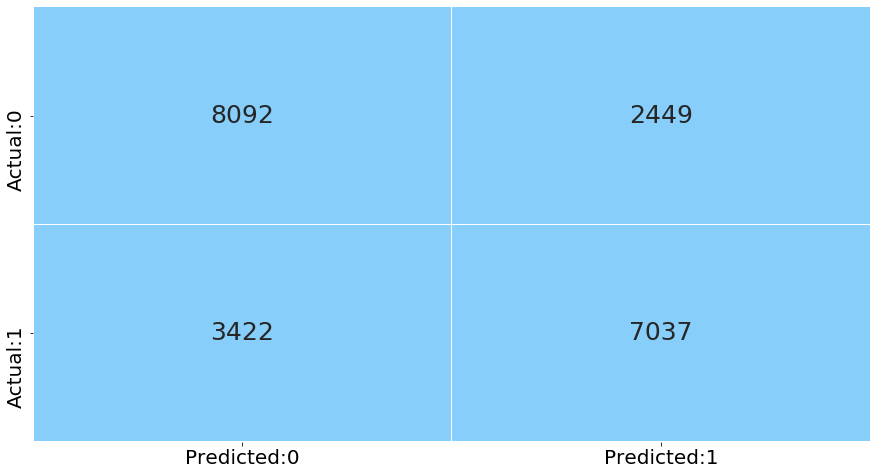

In [58]:
cm = confusion_matrix(y_test, y_pred_rfe)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

True negative: 8092

True positive: 7037

False negative: 3422

False positive: 2449

In [59]:
result = classification_report(y_test, y_pred_rfe)
print(result)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10541
           1       0.74      0.67      0.71     10459

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [60]:
update_final_score_card_rfe(logreg_rfe,"Updated_base_model",X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294


Not much change in accuracy in the base and the updated model

# Naive Bayes Classification

In [61]:
from sklearn.naive_bayes import GaussianNB
nbcla = GaussianNB()
nbcla.fit(X_train, y_train)
y_predict2 = nbcla.predict(X_test)

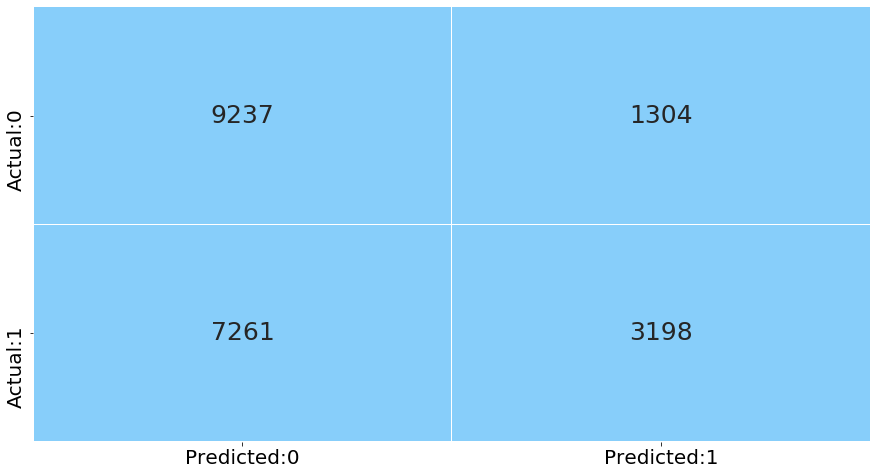

In [62]:
plot_confusion_matrix(nbcla)

True negative: 9237

True positive: 3198

False negative: 7261

False positive: 1304

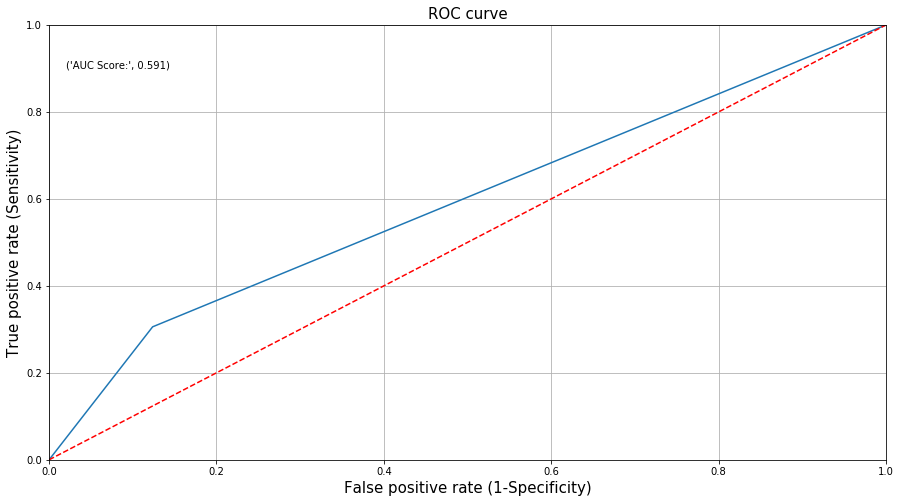

In [63]:
plot_roc(nbcla)

In [64]:
update_final_score_card(nbcla,'Naive Base Model')
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029


**RFE optimized Naive Bayes**

In [65]:
nbcla_RFE = GaussianNB()
nbcla_RFE.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']],y_train)

GaussianNB()

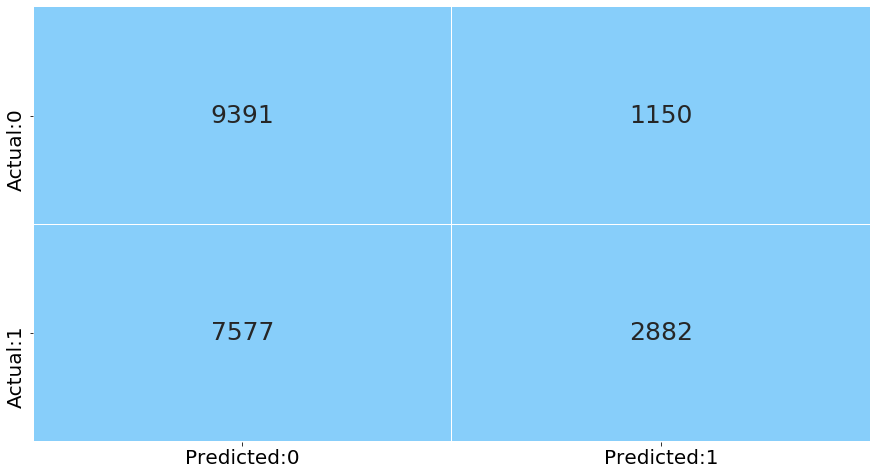

In [66]:
plot_confusion_matrix_rfe(nbcla_RFE,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

True negative: 9391

True positive: 2882

False negative: 7577

False positive: 1150

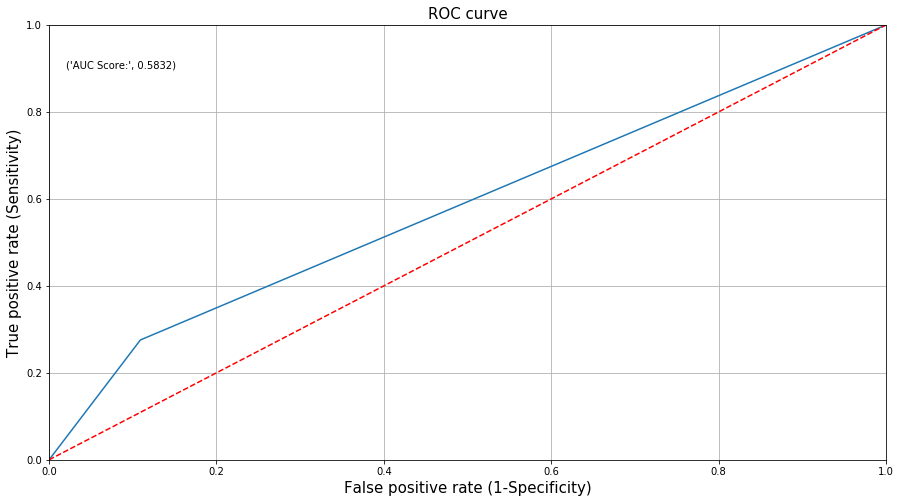

In [67]:
plot_roc_rfe(nbcla_RFE,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [68]:
update_final_score_card_rfe(nbcla_RFE,'RFE_Optimized_Gaussian_Model',X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [69]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227


Here we can see that there is no much improvement observed


**K-Nearest Neighbor classification**
---



In [70]:
from sklearn.neighbors import KNeighborsClassifier
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, y_train)
y_predict3 = knncla.predict(X_test)

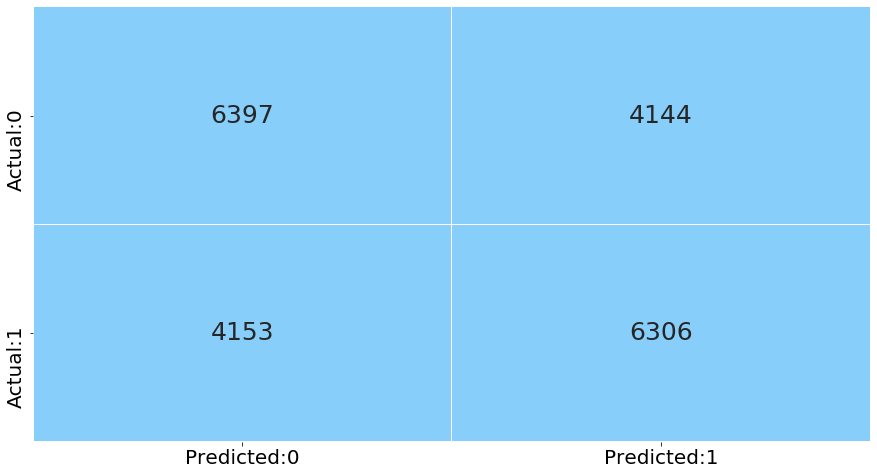

In [71]:
plot_confusion_matrix(knncla)

True negative: 6397

True positive: 6306

False negative: 4153

False positive: 4144

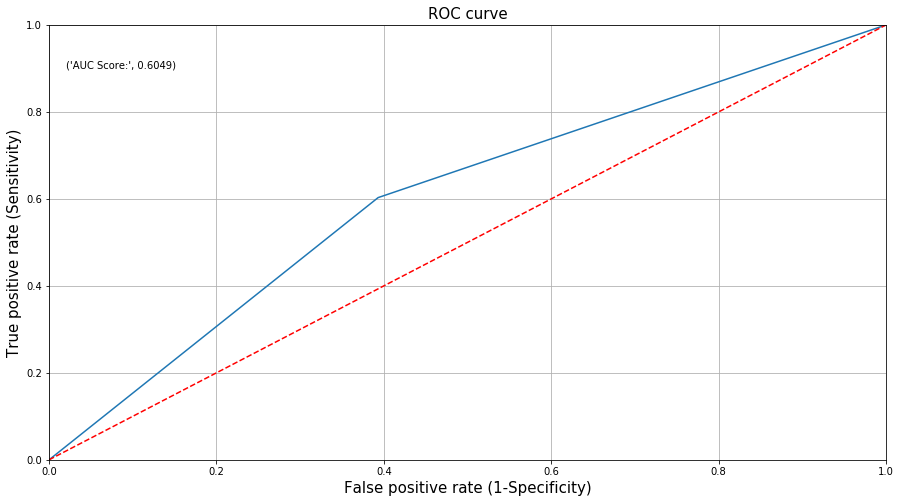

In [72]:
plot_roc(knncla)

In [73]:
update_final_score_card(knncla,'KNN model')

In [74]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897


For the basic KNN Model the Accuracy is 60%

**RFE Optimized KNN Model**

In [75]:
knn_rfe = KNeighborsClassifier(n_neighbors=3)
knn_rfe.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']],y_train)

KNeighborsClassifier(n_neighbors=3)

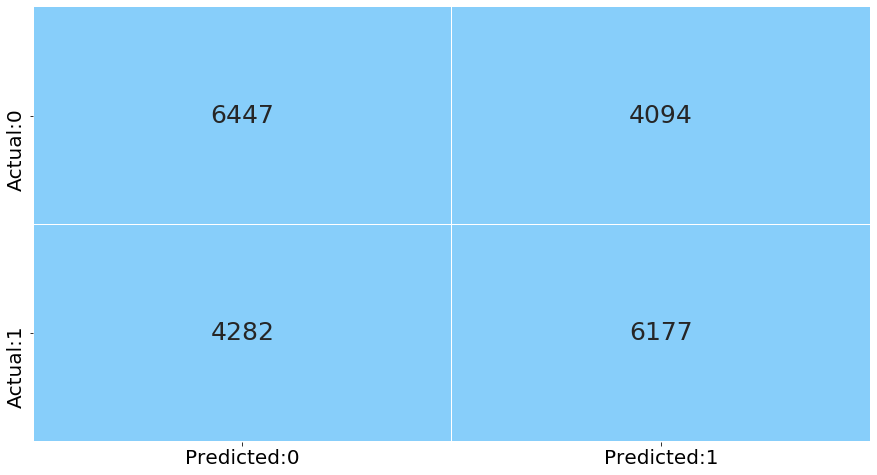

In [76]:
plot_confusion_matrix_rfe(knn_rfe,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

True negative: 6447

True positive: 6177

False negative: 4282

False positive: 4094

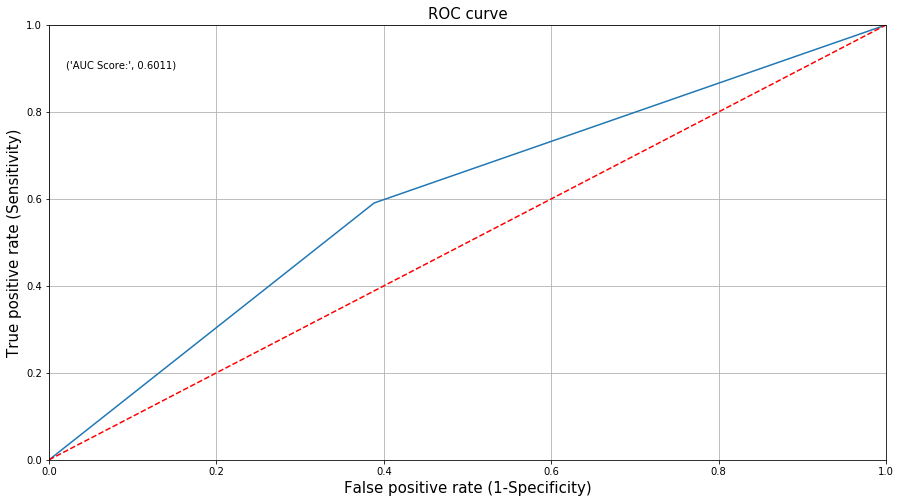

In [77]:
plot_roc_rfe(knn_rfe,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [78]:
update_final_score_card_rfe(knn_rfe,'RFE_Optimized_KNN_Model',X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [79]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102


**KNN GRID SEARCH**

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
tuned_parameters={'n_neighbors':np.arange(1,25,4),'metric':['hamming','euclidean','manhattan']}

knncla=KNeighborsClassifier()
knncla_grid=GridSearchCV(estimator=knncla,param_grid=tuned_parameters,cv=5,scoring='accuracy')

knncla_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  5,  9, 13, 17, 21])},
             scoring='accuracy')

In [82]:
knncla_grid.best_params_

{'metric': 'hamming', 'n_neighbors': 21}

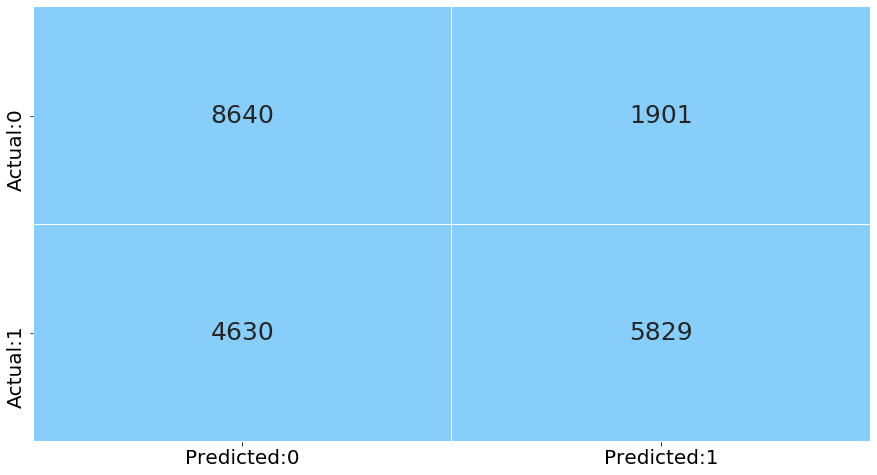

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [83]:
plot_confusion_matrix(knncla_grid)
confusion_matrix

True negative: 8640

True positive: 5829

False negative: 4630

False positive: 1901

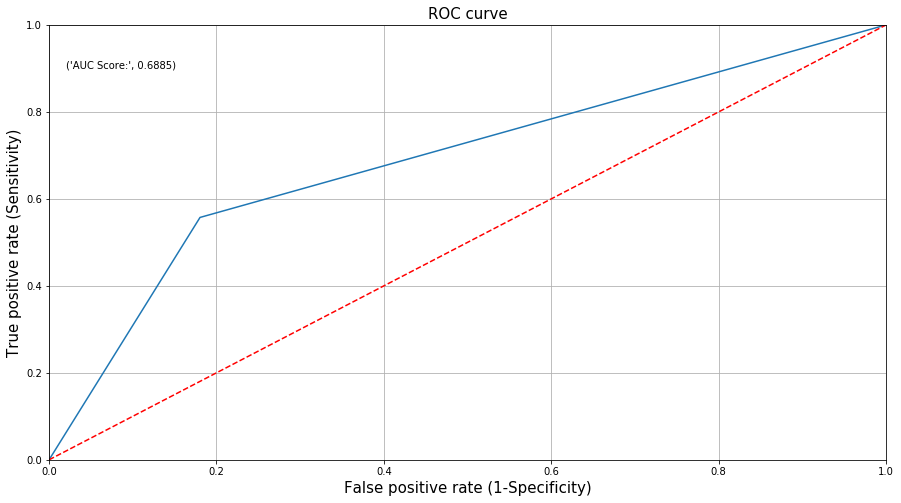

In [84]:
plot_roc(knncla_grid)

In [85]:
update_final_score_card(knncla_grid,'Grid KNN Model')

In [86]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488


On comparing all the 3 models of KNN, we find that: The over all accuracy has increased from 60% to 68% and the same follows for the overall efficiency of the model.

**Decision Tree Classification**

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtcla = DecisionTreeClassifier(criterion='entropy',random_state=9)
dtcla.fit(X_train, y_train)
y_predict4 = dtcla.predict(X_test)

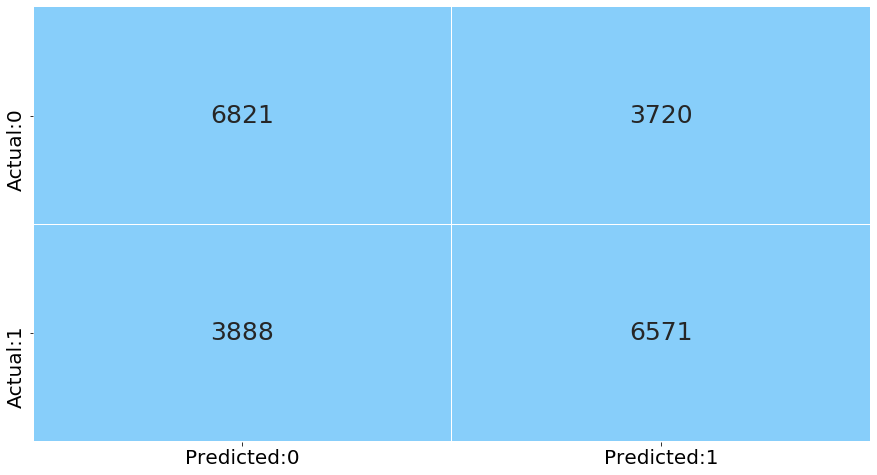

In [88]:
plot_confusion_matrix(dtcla)

True negative: 6821

True positive: 6571

False negative: 3888

False positive: 3720

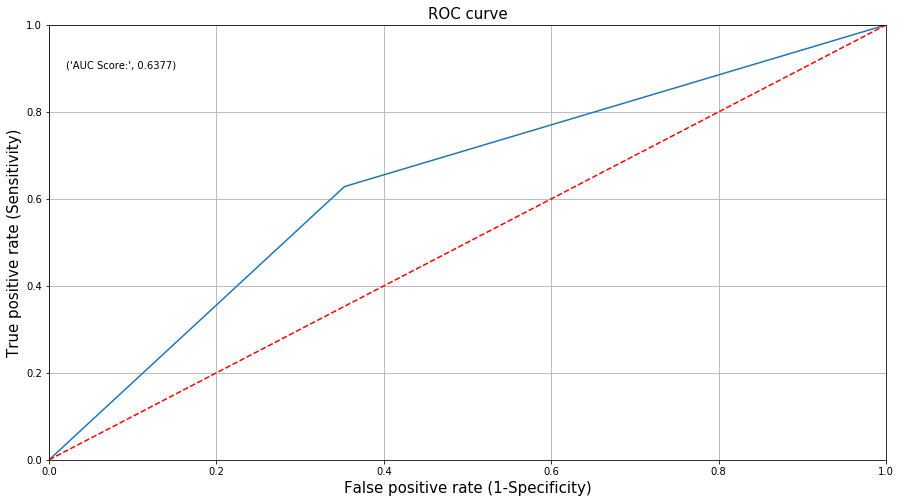

In [89]:
plot_roc(dtcla)

In [90]:
update_final_score_card(dtcla,'Base Decision Tree Model')

In [91]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678


The overall efficiency and accuracy of the model is 63%.

Now lets try to improve this model by using other optimised models

**RFE Optimized Decision Tree Model**

In [92]:
decision_tree_rfe_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_rfe = decision_tree_rfe_classification.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']], y_train)

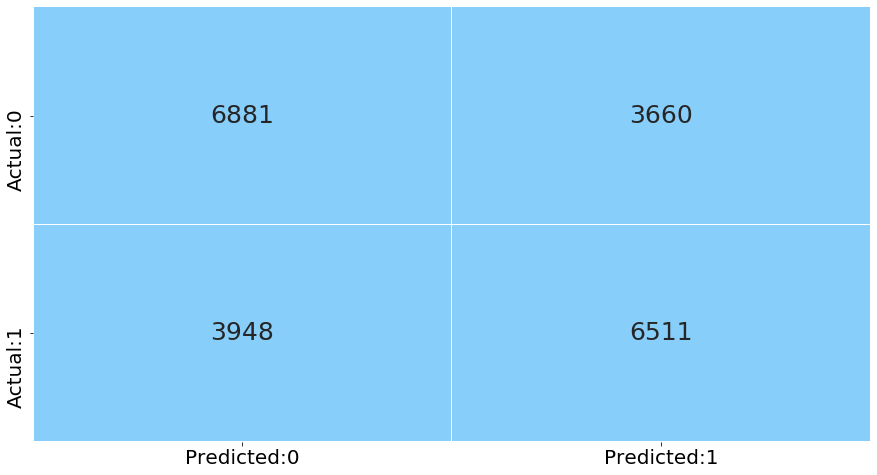

In [93]:
plot_confusion_matrix_rfe(decision_tree_rfe,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

True negative: 6881

True positive: 6511

False negative: 3948

False positive: 3660

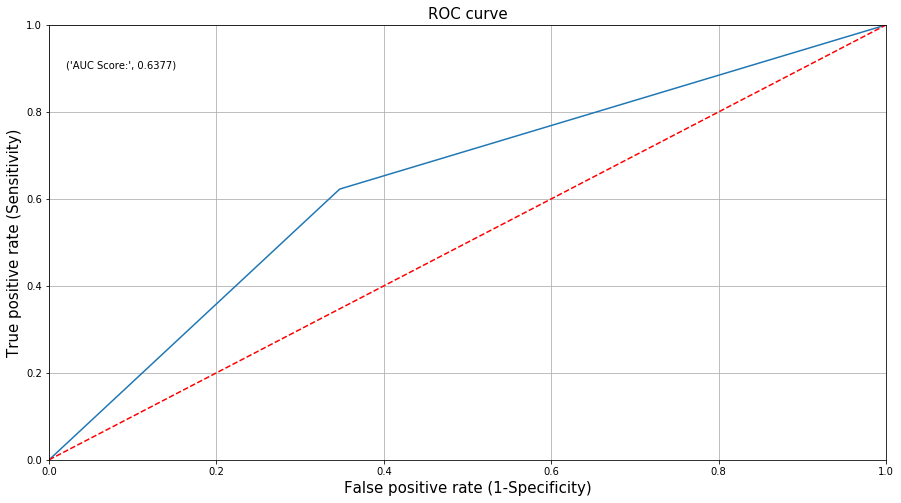

In [94]:
plot_roc_rfe(decision_tree_rfe,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [95]:
update_final_score_card_rfe(decision_tree_rfe,'RFE_Optimized_Decision_Tree_Model',X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [96]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655


**Gridsearch CV**

In [97]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [98]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model = dt_model.fit(X_train, y_train)

In [99]:
update_final_score_card(dt_model,'Decision tree grid_search model')

In [100]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


On comparing all the 3 models based on decision tree, we can see that from the base model to the optimised model the accuracy and efficiency has increased from 63% to 71%

**Random Forest for Classification**

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)
rfcla.fit(X_train, y_train)
y_predict5 = rfcla.predict(X_test)

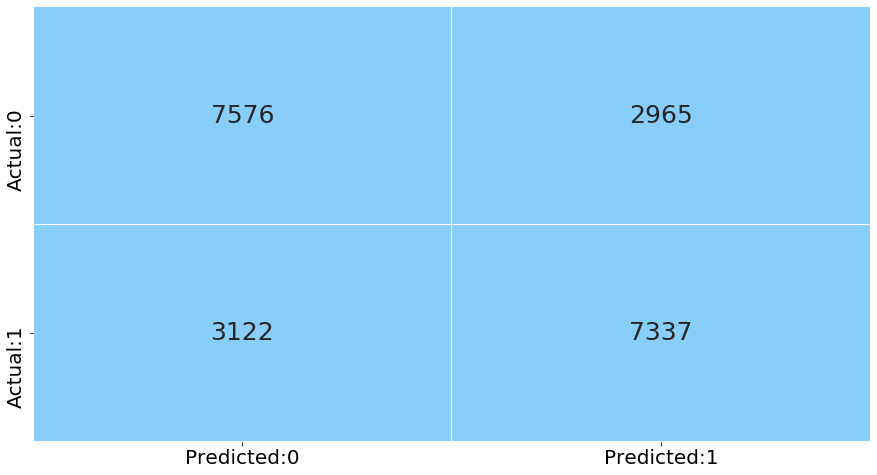

In [102]:
plot_confusion_matrix(rfcla)

True negative: 7576

True positive: 7337

False negative: 3122

False positive: 2965

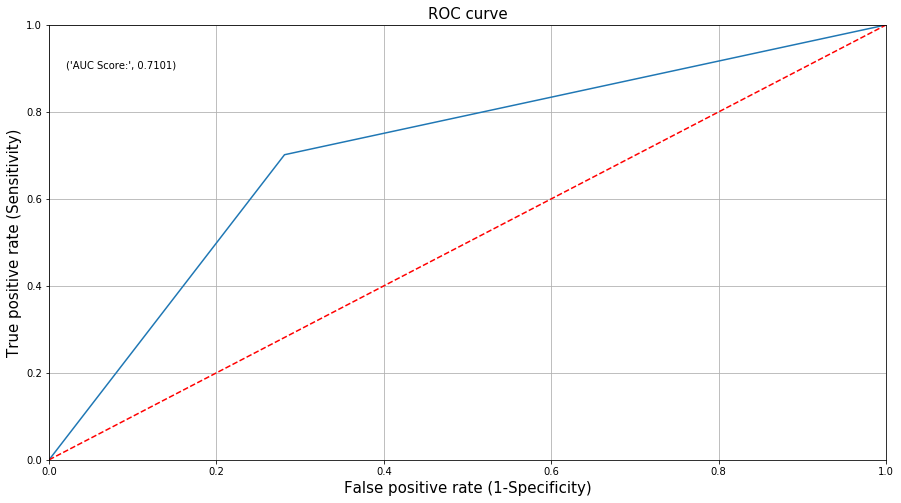

In [103]:
plot_roc(rfcla)

In [104]:
update_final_score_card(rfcla,'Base_Random_Forest_Model')

In [105]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


**GridSearch CV Random Forest**

In [106]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



**Plot the decision tree with tuned hyperparameters.**

In [130]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     10541
           1       0.75      0.67      0.71     10459

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [108]:
update_final_score_card(rf_model,'Random forest grid_search model')

In [109]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


We can see that there is a slight increase in the accuracy of the base model of Random Forest and the optimised model. So we can see a slight increase in accuracy and efficiency from 71% to 72%

**Identify the Important Features**

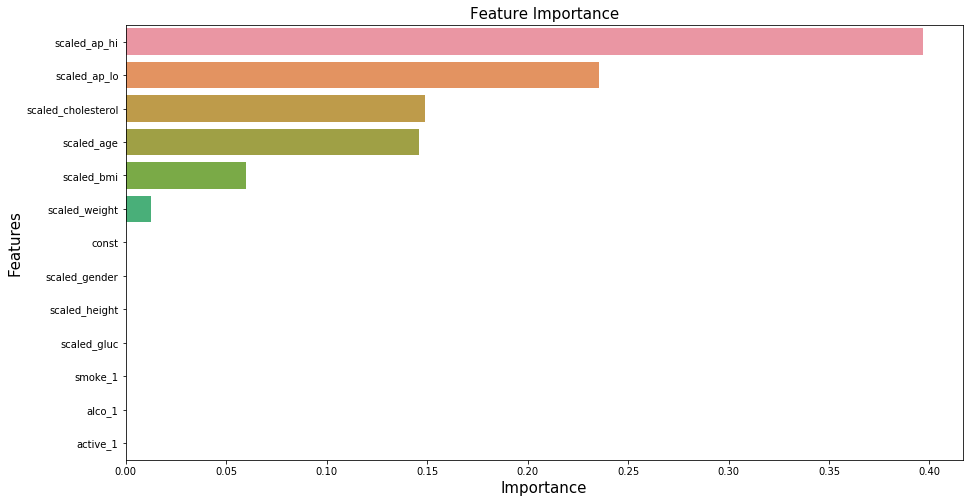

In [110]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

From the above bar plot, we can see that **ap_hi** is the most important feature 

**XGBoost Base Model**

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb_base_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_base_model.fit(X_train, y_train)

[19:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

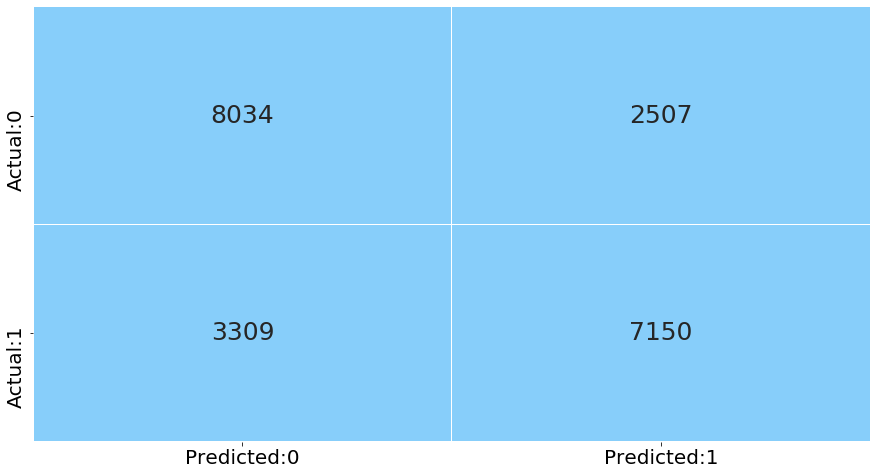

In [113]:
plot_confusion_matrix(xgb_base_model)

True negative: 8034

True positive: 7150

False negative: 3209

False positive: 2507

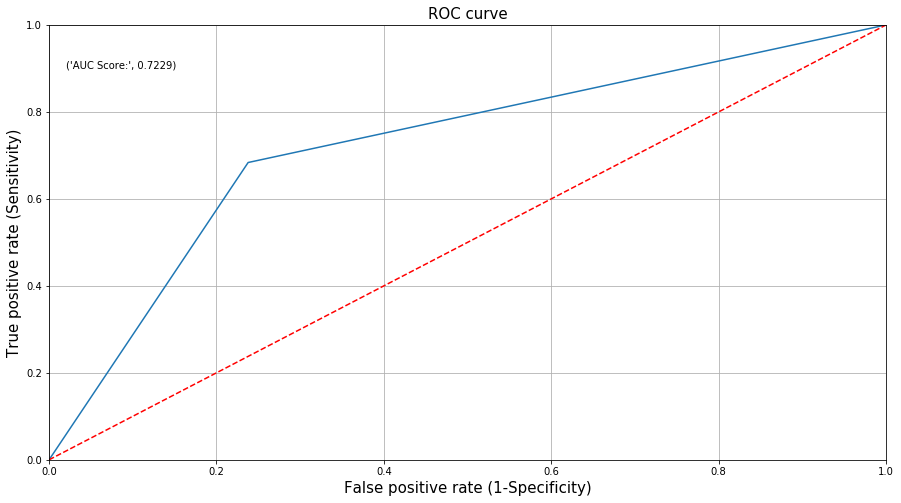

In [114]:
plot_roc(xgb_base_model)

In [115]:
update_final_score_card(xgb_base_model,'XGB Base Model')

In [116]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


The XGB base model has an accuracy and efficiency of 72.3%

**RFE Optimized XGBoost Model**

In [117]:
xgb_rfe_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_rfe_model.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']], y_train)

[19:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

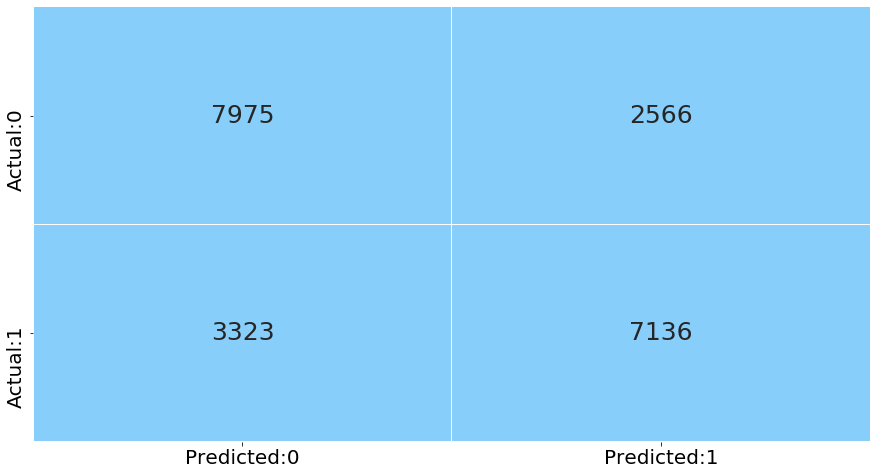

In [118]:
plot_confusion_matrix_rfe(xgb_rfe_model,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

True negative: 8096

True positive: 7188

False negative: 3271

False positive: 2445

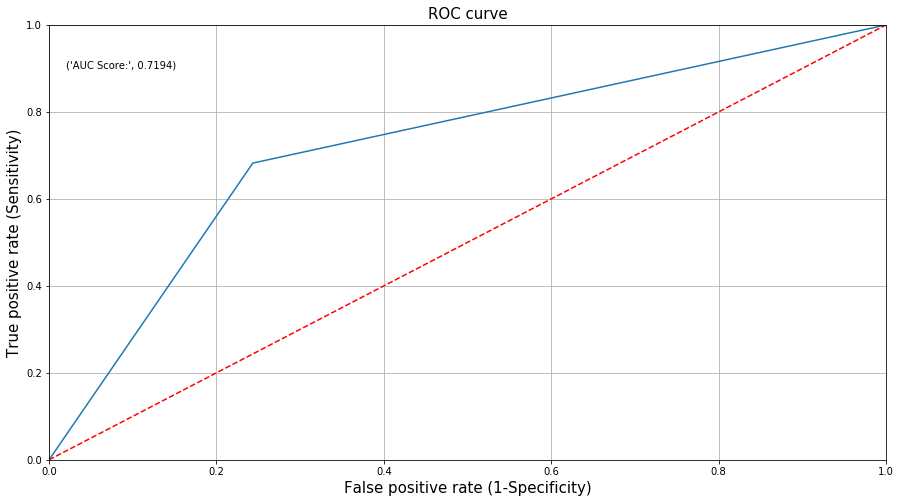

In [119]:
plot_roc_rfe(xgb_rfe_model,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [120]:
update_final_score_card_rfe(xgb_rfe_model,'RFE_Optimized_XGBoost_Model',X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [121]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


**GridSearch Optimized XGBoost Model**

In [122]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model_gs = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model_gs, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']], y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[19:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [123]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model_grid_optimized = xgb_grid_model.fit(X_train[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']], y_train)

[19:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


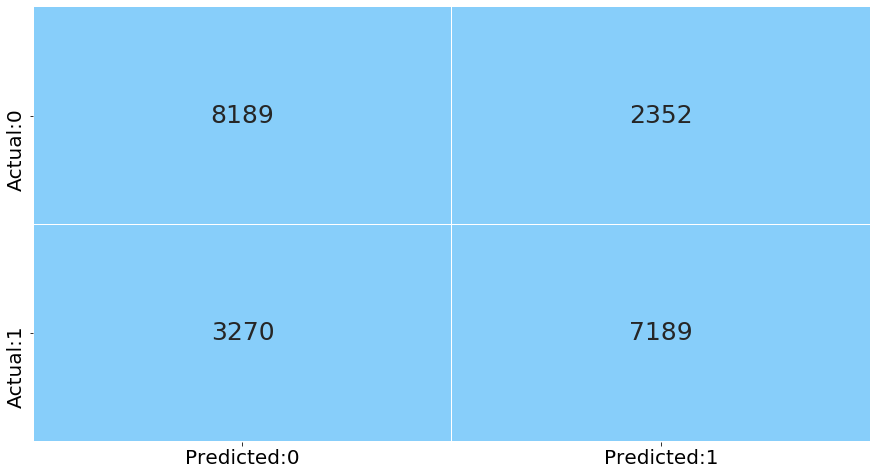

In [124]:
plot_confusion_matrix_rfe(xgb_model_grid_optimized,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

True negative: 8189

True positive: 7189

False negative: 3270

False positive: 2352

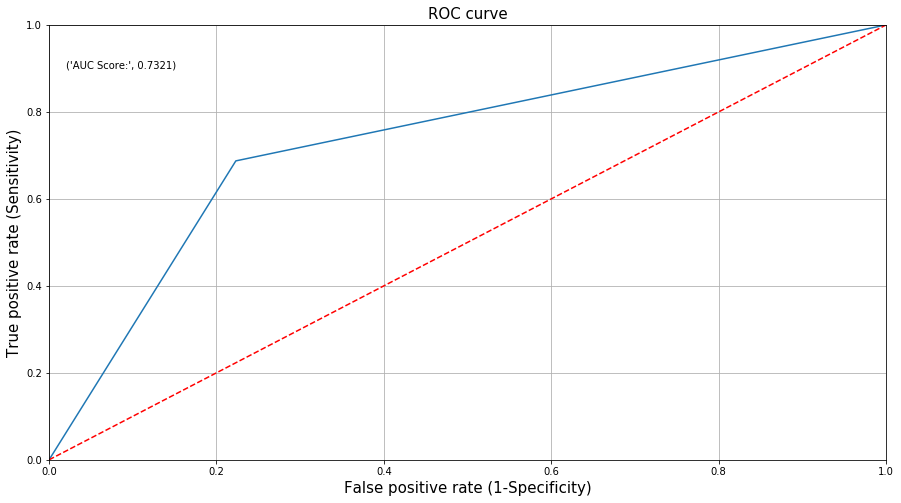

In [125]:
plot_roc_rfe(xgb_model_grid_optimized,X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [126]:
update_final_score_card_rfe(xgb_model_grid_optimized,'GridSearch_Optimized_XGBoost_Model',X_test[['const','scaled_age',  'scaled_height', 'scaled_weight',
       'scaled_ap_hi', 'scaled_ap_lo', 'scaled_cholesterol', 'scaled_gluc',
        'smoke_1', 'alco_1', 'active_1']])

In [127]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


On comparing all the three XGB models, we can see that there is a slight increase in the accuracy in the GridSearch_Optimized_XGBoost model.

**Feature Importance using XGBoost Model**

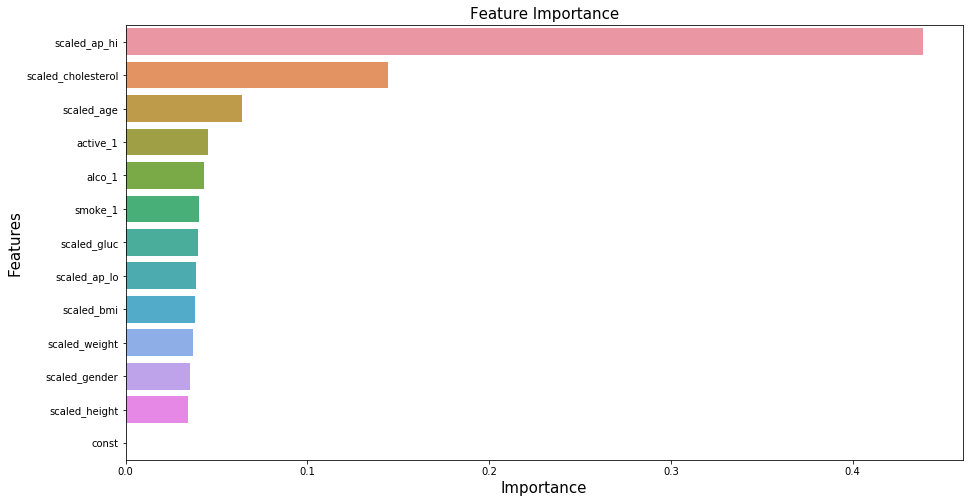

In [128]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_base_model.feature_importances_}
                                 )
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

Again the most important feature is **ap_hi**.

In [129]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base Model,0.720476,0.741806,0.673009,0.440742,0.705735,0.782268
1,Updated_base_model,0.720429,0.741830,0.672818,0.440646,0.705641,0.782294
2,Naive Base Model,0.592143,0.710351,0.305765,0.182462,0.427512,0.591029
3,RFE_Optimized_Gaussian_Model,0.584429,0.714782,0.275552,0.166853,0.397764,0.583227
4,KNN model,0.604905,0.603445,0.602926,0.209795,0.603185,0.604897
5,RFE_Optimized_KNN_Model,0.601143,0.601402,0.590592,0.202218,0.595948,0.601102
6,Grid KNN Model,0.689000,0.754075,0.557319,0.377359,0.640937,0.688488
7,Base Decision Tree Model,0.637714,0.638519,0.628263,0.275372,0.633349,0.637678
8,RFE_Optimized_Decision_Tree_Model,0.637714,0.640153,0.622526,0.275340,0.631217,0.637655
9,Decision tree grid_search model,0.711714,0.753481,0.625968,0.423040,0.683831,0.711381


## Conclusion:

#### In terms of Business Requirements 

**Based on Accuracy we can say that optimised Gridsearch XG Boost Model is the best as compared to the other models as it has the highest accuracy of 73.22%.**


**But we also need to know the actual true percentage of patients suffering from cardiovascular disease, so based on the Recall score we can say that the Basic Random forest model is the best fit as compared to other models.**